In [16]:
import pandas as pd
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics         import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network  import MLPClassifier
from sklearn.metrics         import plot_confusion_matrix
from sklearn.preprocessing   import StandardScaler

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
names = ["sepal length", "sepal width", "petal length", "petal width", "Classe"]

In [4]:
irisdata = pd.read_csv(url, names=names)

# separa somente os dados (4 primeiras colunas)
X_caracteristicas = irisdata.iloc[:, 0:4]

Y_classes = irisdata.iloc[:, 4]

In [9]:
irisdata['Classe'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# transforma os nomes das classes em numeros para poder ser aceito no algortimo

le = preprocessing.LabelEncoder()
y = le.fit_transform(Y_classes)

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_caracteristicas, y, test_size=0.3, random_state=0)

In [15]:
# cria o modelo de classificação usando a rede neural com 3 camadas escondidas e 10 perceptrons
# maximo de 1000 iterações para refinar o modelo e reduzir os erros

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

acucaria = accuracy_score(y_test, predictions)
print(acucaria)

# quantidade de acertos ( dos 45 foram 44 corretos)
acucaria = accuracy_score(y_test, predictions, normalize=False)
print(acucaria)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777
44


- A classe SETOSA possui 16 classificações sendo todas corretas
- A classe VERSICOLOR houveram 18 predições, sendo 17 corretas 1 com erro
- A classe VIRGINICA houveram 11 todas corretas

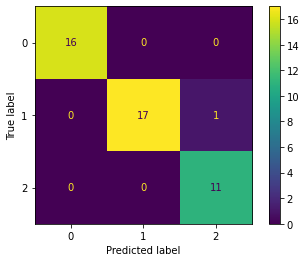

In [12]:
# relatório das métricas de confusão
plot_confusion_matrix(mlp, X_test, y_test)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [23]:
# Feature scaling = é feito somente nos dados de treino, não incluido os valores de teste

predictions = mlp.predict(X_test)

acucaria = accuracy_score(y_test, predictions)
print(acucaria, '--- com feature scaling')


acucaria = accuracy_score(y_test, predictions, normalize=False)
print(acucaria, '--- com feature scaling')



0.9777777777777777 --- com feature scaling
44 --- com feature scaling
